In [112]:
# librerías 
import pandas as pd                   # Para la manipulación y análisis de datos
import numpy as np                    # Para operaciones matemáticas avanzadas
import matplotlib.pyplot as plt       # Para visualización de datos básicos
import seaborn as sns                 # Para visualización avanzada de datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Para normalización y estandarización de variables
from scipy import stats # Funciones estadísticas y pruebas de hipótesis
from sklearn.preprocessing import LabelEncoder

In [6]:
# cargamos los datasets 
csv_set = "train.csv"
df_train = pd.read_csv(csv_set, sep = ',')  

csv_set= "test.csv"
df_test = pd.read_csv(csv_set, sep = ',')  

# Filas y columnas de los datasets


print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [9]:
#
#primeros 10 registros en train

df_train.head(10)



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [10]:
#primeros 10 registros en test
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [11]:
# nombre de coulmnas  de train
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
#nombre de columnas de test
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
#Info general del dataset de train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
#infor general del dataset de test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [15]:
#vamos a droppear la columna ID, ya que no la necesitamos para el análisis
train_ID = df_train['Id']
test_ID = df_test['Id']

df_train.drop(['Id'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)

df_train.shape, df_test.shape

((1460, 80), (1459, 79))

In [26]:
#datos faltantes en train
def missing_data(df,n):    
    # valores faltantes
    valores_totales = df.isnull().sum().sort_values(ascending=False)          
     # % de valores faltantes
    percentage = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)*100 
     # sin valores unicos
    no_unique = df.nunique()                                  
    missing_data = pd.concat([valores_totales, percentage, no_unique], axis=1, 
                             keys=['Numero faltantes', '% valores faltantes','valoresno unicos'], sort = False)
    
    print(missing_data.head(n))
    #datos faltantes en train    
missing_data(df_train,20)


              Numero faltantes  % valores faltantes  valoresno unicos
PoolQC                    1453            99.520548                 3
MiscFeature               1406            96.301370                 4
Alley                     1369            93.767123                 2
Fence                     1179            80.753425                 4
MasVnrType                 872            59.726027                 3
FireplaceQu                690            47.260274                 5
LotFrontage                259            17.739726               110
GarageYrBlt                 81             5.547945                97
GarageCond                  81             5.547945                 5
GarageType                  81             5.547945                 6
GarageFinish                81             5.547945                 3
GarageQual                  81             5.547945                 5
BsmtExposure                38             2.602740                 4
BsmtFinType2        

In [27]:
missing_data(df_test,20)

              Numero faltantes  % valores faltantes  valoresno unicos
PoolQC                    1456            99.794380                 2
MiscFeature               1408            96.504455                 3
Alley                     1352            92.666210                 2
Fence                     1169            80.123372                 4
MasVnrType                 894            61.274846                 3
FireplaceQu                730            50.034270                 5
LotFrontage                227            15.558602               115
GarageYrBlt                 78             5.346127                97
GarageFinish                78             5.346127                 3
GarageQual                  78             5.346127                 4
GarageCond                  78             5.346127                 5
GarageType                  76             5.209047                 6
BsmtCond                    45             3.084304                 4
BsmtExposure        

PoolQC, miscFeature y alley van a ser droppeadas porque tienen bastantes numeros faltantes

In [28]:
#calculamos el total de valores faltantes en train
null_train = df_train.isnull().sum().sum()
print(null_train)

# calculamos el total de valores faltantes en test
null_test = df_test.isnull().sum().sum()
print(null_test)

7829
7878


In [38]:
def clean_data(df):
    """
    Limpia el DataFrame imputando valores faltantes y eliminando columnas no relevantes o con muchos valores nulos.
    """
    # Crear una copia del DataFrame para evitar advertencias de pandas
    df = df.copy()

    #  # Eliminar columnas con muchos valores nulos o que no nos sirven (si existen)
    # df.drop(['Utilities', 'PoolQC', 'MiscFeature', 'Alley'], axis=1, errors='ignore', inplace=True)
    
    # Lista de columnas a eliminar si existen
    cols_to_drop = ['Utilities', 'PoolQC', 'MiscFeature', 'Alley']
    
    # Eliminar solo las columnas que existen en el DataFrame
    df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

    # Valor null significa que no tiene esa característica, por lo que se reemplaza por 'None'
    fill_none_cols = ['Fence', 'FireplaceQu', 'MasVnrType', 'MSSubClass']
    df[fill_none_cols] = df[fill_none_cols].fillna('None')

    # Llenamos con la mediana para columnas con valores repetitivos
    fill_median_cols = ['LotFrontage']
    df[fill_median_cols] = df[fill_median_cols].fillna(df[fill_median_cols].median())

    # Null puede significar algo típico, por lo que se reemplaza por 'Typ'
    fill_typical_cols = ['Functional']
    df[fill_typical_cols] = df[fill_typical_cols].fillna('Typ')

    # Reemplazamos null por la moda
    fill_mode_cols = ['KitchenQual', 'Electrical', 'SaleType', 'Exterior1st', 'Exterior2nd', 'MSZoning']
    for col in fill_mode_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    # Null values significan no mansory veneer, por lo que se reemplaza por 0
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

    # Valores nulos probablemente significan que no hay garaje
    garage_none_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
    df[garage_none_cols] = df[garage_none_cols].fillna('None')

    # Valores nulos probablemente significan que no hay garaje ni autos en el garaje
    garage_zero_cols = ['GarageYrBlt', 'GarageArea', 'GarageCars']
    df[garage_zero_cols] = df[garage_zero_cols].fillna(0)

    # Valores nulos significan que no hay sótano
    basement_zero_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
    df[basement_zero_cols] = df[basement_zero_cols].fillna(0)

    # Valores nulos significan que no hay sótano (características categóricas)
    basement_none_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
    df[basement_none_cols] = df[basement_none_cols].fillna('None')

    return df


In [39]:
df_train = clean_data(df_train)
df_test = clean_data(df_test)

# cnumero total de valores faltantes en train
null_train = df_train.isnull().sum().sum()
print(null_train)

# numero total de valores faltantes en test
null_test = df_test.isnull().sum().sum()
print(null_test)

0
0


In [134]:
# Identificamos las variables numericas en los datasets
num_features_train = df_train.select_dtypes(include=[np.number]).columns
num_features_test = df_test.select_dtypes(include=[np.number]).columns

print("Variables numéricas en el dataset de train:", num_features_train)
print("Variables numéricas en el dataset de test:", num_features_test)

Variables numéricas en el dataset de train: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Variables numéricas en el dataset de test: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'Bedroom

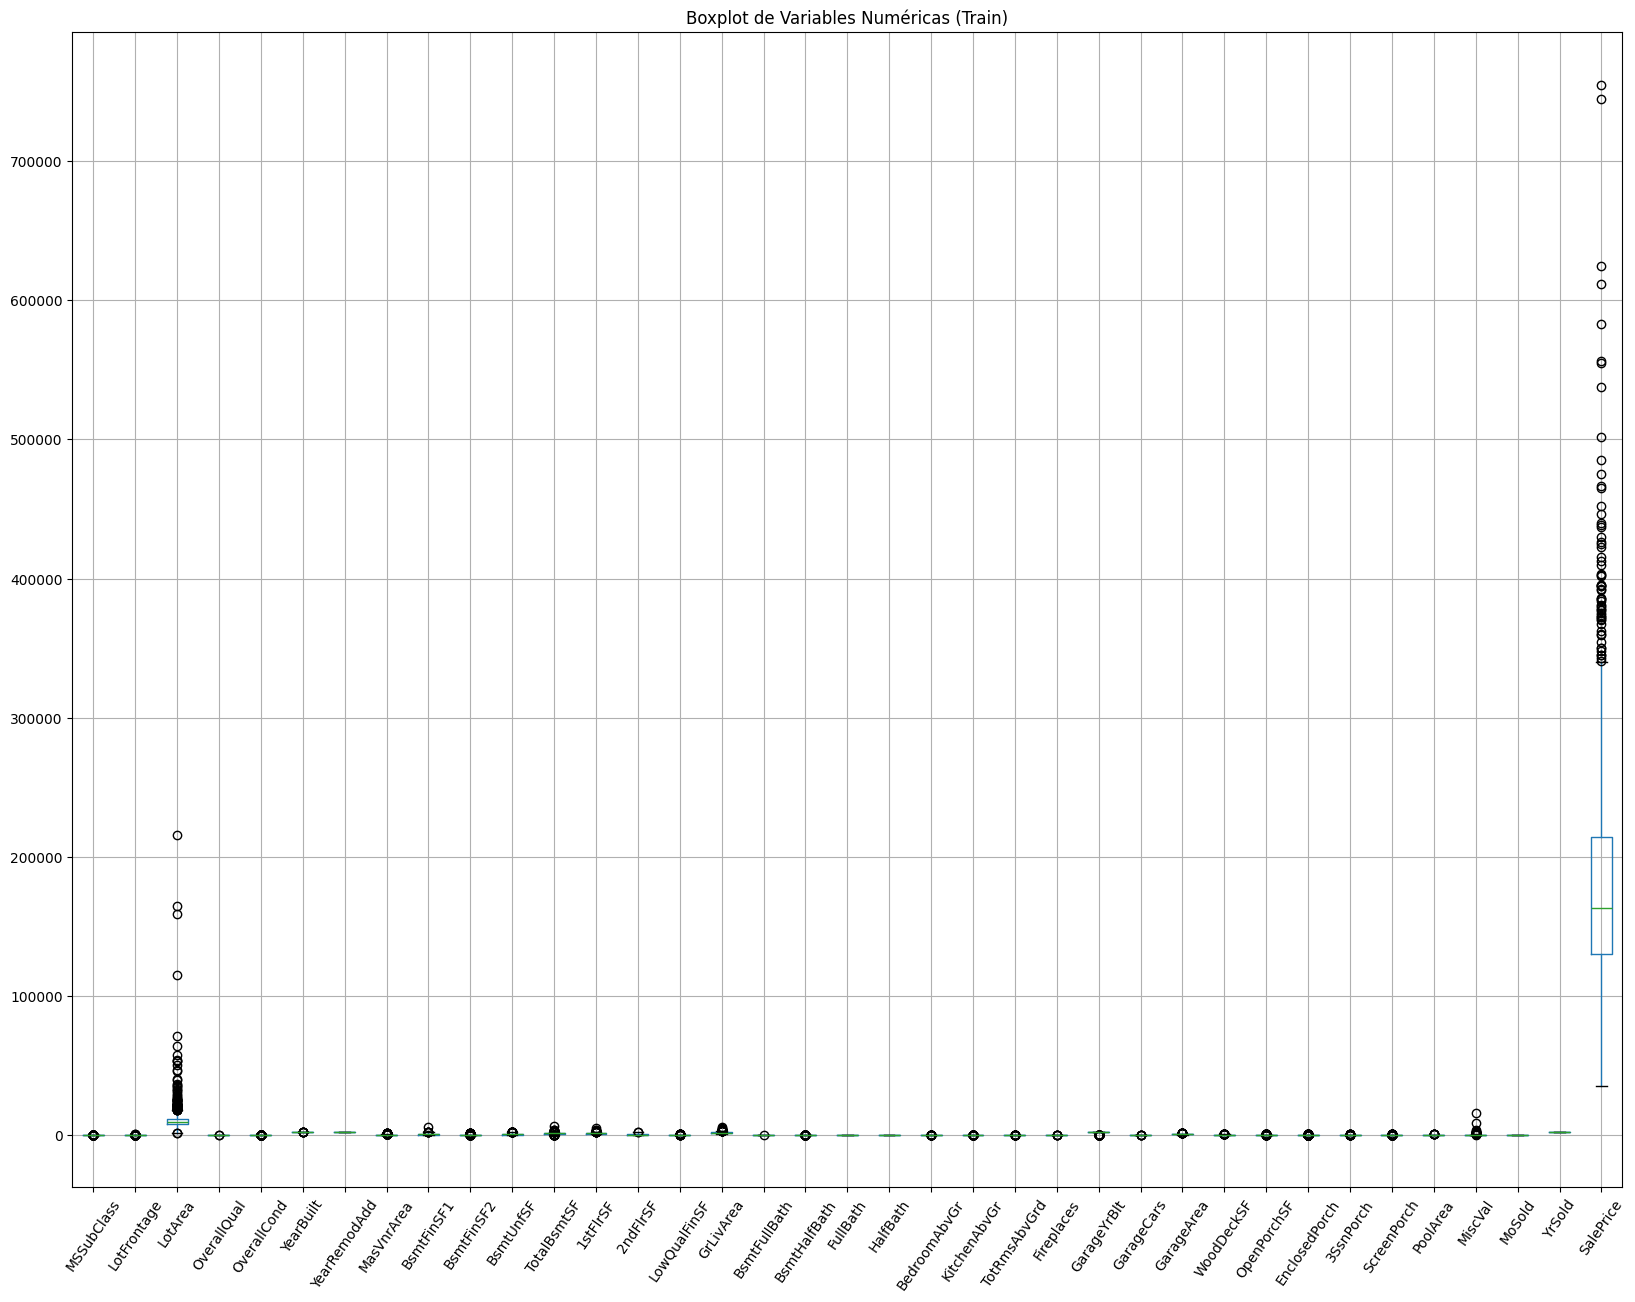

In [53]:
# Boxplot para detectar outliers en las variables numéricas del dataset de train
plt.figure(figsize=(20, 15))
df_train[num_features_train].boxplot()
plt.xticks(rotation=55)
plt.title('Boxplot de Variables Numéricas (Train)')
plt.show()

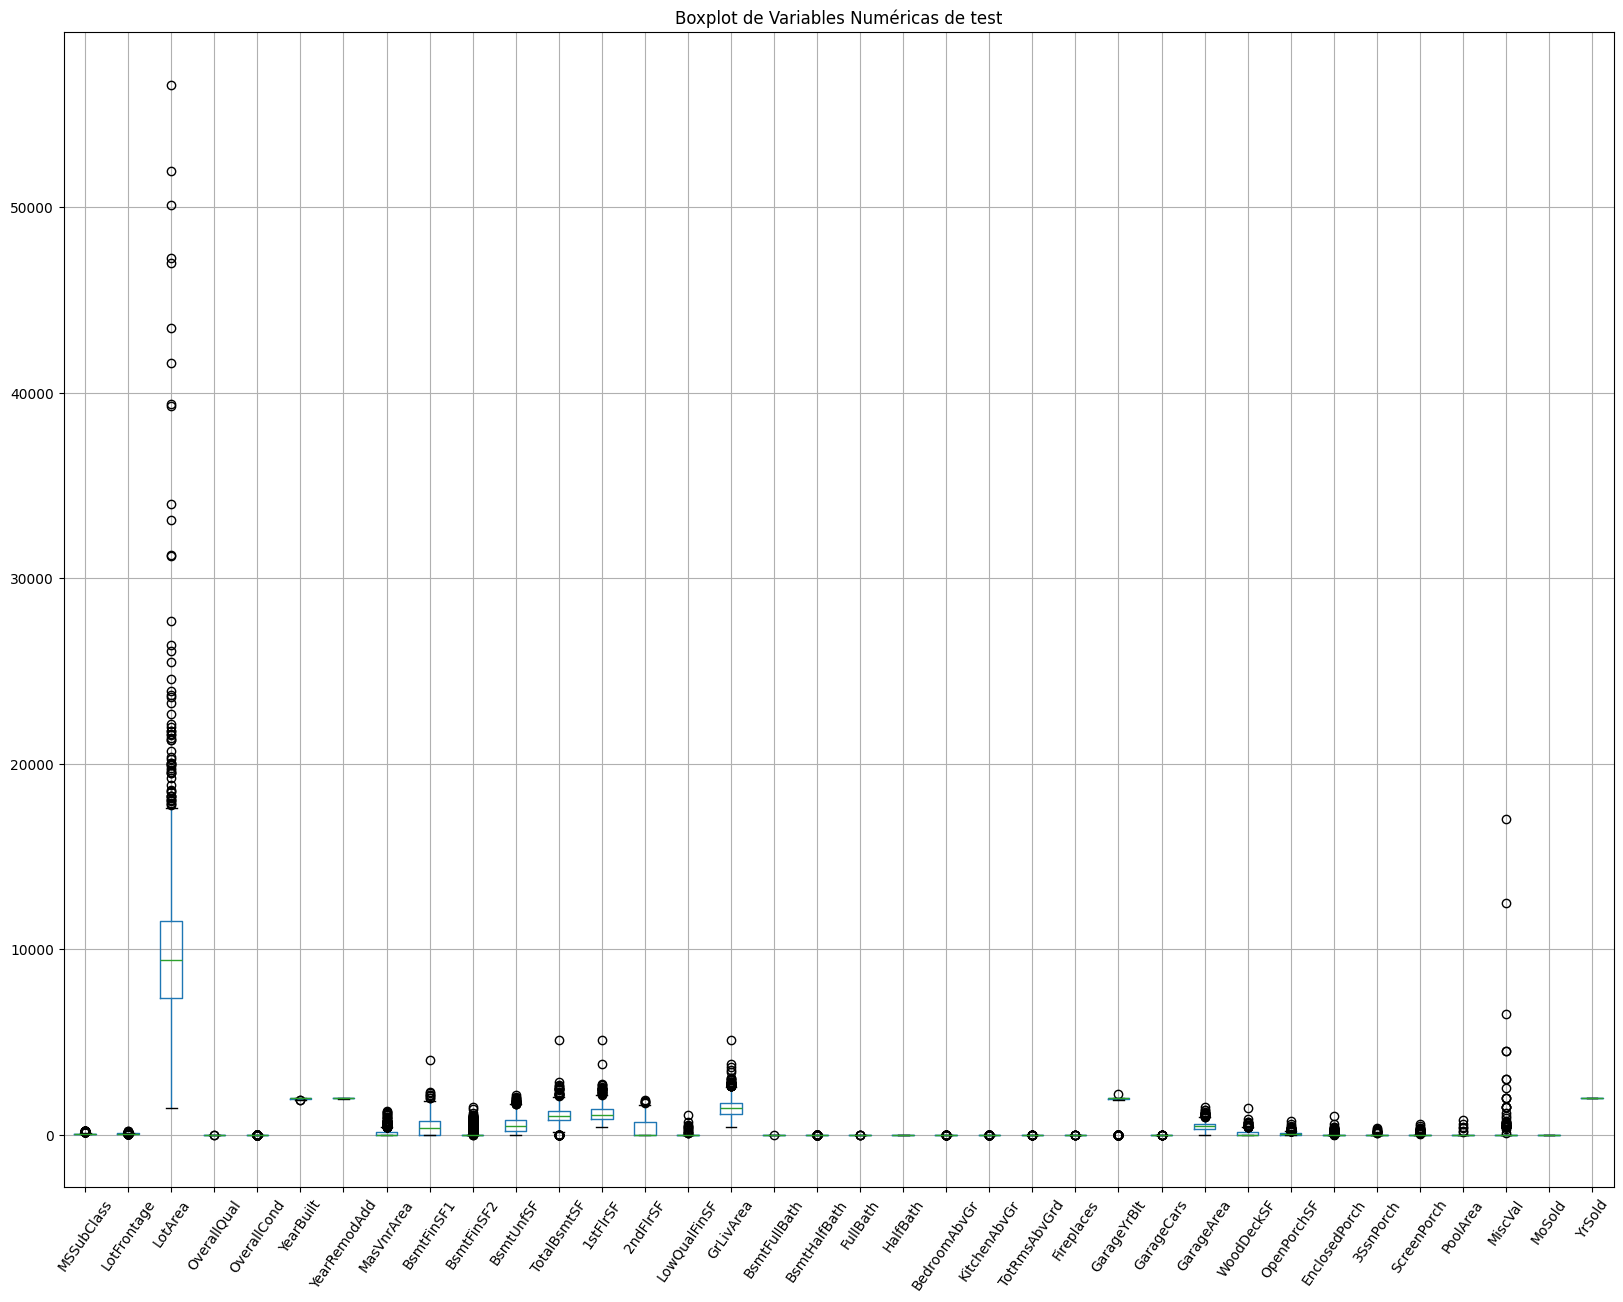

In [54]:
# Boxplot para detectar outliers en las variables numéricas del dataset de test
plt.figure(figsize=(20, 15))
df_test[num_features_test].boxplot()
plt.xticks(rotation=55)
plt.title('Boxplot de Variables Numéricas de test')
plt.show()

In [80]:
# Detección de outliers usando Z-score para el conjunto de train
z_scores_train = np.abs(stats.zscore(df_train[num_features_train]))
df_train_no_outliers = df_train[(z_scores_train < 3).all(axis=1)]
print("Outliers detectados usando Z-score en Train:", df_train_no_outliers.shape[0])

# Detección de outliers usando Z-score para el conjunto de test
z_scores_test = np.abs(stats.zscore(df_test[num_features_test]))
df_test_no_outliers = df_test[(z_scores_test < 3).all(axis=1)]
print("Outliers  usando Z-score en Test:", df_test_no_outliers.shape[0])

print("Dataset de train después de eliminar outliers usando Z-score:", df_train_no_outliers.shape)
print("Dataset de test después de eliminar outliers usando Z-score:", df_test_no_outliers.shape)

Outliers detectados usando Z-score en Train: 969
Outliers  usando Z-score en Test: 986
Dataset de train después de eliminar outliers usando Z-score: (969, 76)
Dataset de test después de eliminar outliers usando Z-score: (986, 75)


In [81]:
# Recalcular el IQR después de eliminar outliers con Z-score
Q1_train_no_outliers = df_train_no_outliers[num_features_train].quantile(0.25)
Q3_train_no_outliers = df_train_no_outliers[num_features_train].quantile(0.75)
IQR_train_no_outliers = Q3_train_no_outliers - Q1_train_no_outliers

outliers_iqr_train_no_outliers = (df_train_no_outliers[num_features_train] < (Q1_train_no_outliers - 1.5 * IQR_train_no_outliers)) | (df_train_no_outliers[num_features_train] > (Q3_train_no_outliers + 1.5 * IQR_train_no_outliers))

Q1_test_no_outliers = df_test_no_outliers[num_features_test].quantile(0.25)
Q3_test_no_outliers = df_test_no_outliers[num_features_test].quantile(0.75)
IQR_test_no_outliers = Q3_test_no_outliers - Q1_test_no_outliers

outliers_iqr_test_no_outliers = (df_test_no_outliers[num_features_test] < (Q1_test_no_outliers - 1.5 * IQR_test_no_outliers)) | (df_test_no_outliers[num_features_test] > (Q3_test_no_outliers + 1.5 * IQR_test_no_outliers))

Q1_test_no_outliers = df_test_no_outliers[num_features_test].quantile(0.25)
Q3_test_no_outliers = df_test_no_outliers[num_features_test].quantile(0.75)
IQR_test_no_outliers = Q3_test_no_outliers - Q1_test_no_outliers

outliers_iqr_test_no_outliers = (df_test_no_outliers[num_features_test] < (Q1_test_no_outliers - 1.5 * IQR_test_no_outliers)) | (df_test_no_outliers[num_features_test] > (Q3_test_no_outliers + 1.5 * IQR_test_no_outliers))


In [84]:

# Transformación logarítmica para manejar outliers en algunas variables
columns_to_transform = ['GrLivArea', 'TotalBsmtSF']  # Ejemplo de columnas relevantes
# Tenemos que convertir a float antes de aplicar la transformación logarítmica y usamos .loc para evitar SettingWithCopyWarning
for col in columns_to_transform:
    df_train_no_outliers.loc[:, col] = np.log1p(df_train_no_outliers[col].astype(float))
    df_test_no_outliers.loc[:, col] = np.log1p(df_test_no_outliers[col].astype(float))

In [85]:

# Imputación de los outliers en el conjunto de train
for col in num_features_train:
    median = df_train_no_outliers[col].median()
    df_train_no_outliers.loc[outliers_iqr_train_no_outliers[col], col] = median

# Imputación de los outliers en el conjunto de test
for col in num_features_test:
    median = df_test_no_outliers[col].median()
    df_test_no_outliers.loc[outliers_iqr_test_no_outliers[col], col] = median


In [138]:
# Normalización (Min-Max Scaling):
#    - Ajusta los valores de las características numéricas a un rango específico, generalmente entre 0 y 1.
#    - Útil para algoritmos que calculan distancias (e.g., k-Nearest Neighbors, Support Vector Machines) y redes neuronales.
#    - Adecuada cuando las características tienen diferentes escalas y no hay suposiciones sobre la distribución de los datos.
#    - No cambia la forma de la distribución de los datos.

# Aplicar Min-Max Scaling (Normalización)
min_max_scaler = MinMaxScaler()

# Excluir la columna 'SalePrice' del escalado porque SalePrice está presente en el conjunto de train (df_train_no_outliers) pero no en el conjunto de test (df_test_no_outliers)
features_to_scale_train = df_train_no_outliers[num_features_train].drop(columns=['SalePrice'], errors='ignore')
features_to_scale_test = df_test_no_outliers[num_features_test]

# Crear copias de los DataFrames
df_train_minmax_scaled = df_train_no_outliers.copy()
df_test_minmax_scaled = df_test_no_outliers.copy()

# Ajustamos y transformamos los datos de train
df_train_minmax_scaled[features_to_scale_train.columns] = min_max_scaler.fit_transform(features_to_scale_train)

# Solo transformar los datos de test
df_test_minmax_scaled[features_to_scale_test.columns] = min_max_scaler.transform(features_to_scale_test)

# Mostrar un ejemplo de los datos normalizados
print("Datos de test después de Min-Max Scaling (Normalización):")
print(df_train_minmax_scaled.head())


ValueError: Found array with 0 sample(s) (shape=(0, 36)) while a minimum of 1 is required by MinMaxScaler.

In [89]:
#Estandarización (Z-score Scaling):
#    - Transforma los datos para que tengan una media de 0 y una desviación estándar de 1.
#    - Se recomienda para algoritmos que asumen que los datos siguen una distribución normal (e.g., Regresión Lineal, PCA).
#    - Ayuda a identificar outliers y es menos sensible a los valores extremos que la normalización.


#  Z-score (Estandarización)
standard_scaler = StandardScaler()

# Crear copias de los DataFrames
df_train_standard_scaled = df_train_no_outliers.copy()
df_test_standard_scaled = df_test_no_outliers.copy()

# Ajustar y transformar los datos de train
df_train_standard_scaled[features_to_scale_train.columns] = standard_scaler.fit_transform(features_to_scale_train)

# Solo transformar los datos de test
df_test_standard_scaled[features_to_scale_test.columns] = standard_scaler.transform(features_to_scale_test)

# Mostrar un ejemplo de los datos estandarizados
print("Datos de test después de Z-score Scaling (Estandarización):")
print(df_train_standard_scaled.head()) 


#- Se usa Normalización cuando los algoritmos sean sensibles a la escala de las variables o cuando las variables no sigan una distribución normal.

# Se usa Estandarización cuando los algoritmos supongan normalidad en los datos o para mantener la forma de la distribución original.
#
    

Datos de test después de Z-score Scaling (Estandarización):
    MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0     0.461793       RL    -0.273904 -0.167093   Pave      Reg         Lvl   
2     0.461793       RL    -0.036150  0.757751   Pave      IR1         Lvl   
4     0.461793       RL     1.231871  1.751959   Pave      IR1         Lvl   
6    -0.947030       RL     0.518610  0.372620   Pave      Reg         Lvl   
10   -0.947030       RL     0.122353  0.741236   Pave      Reg         Lvl   

   LotConfig LandSlope Neighborhood  ... 3SsnPorch ScreenPorch PoolArea Fence  \
0     Inside       Gtl      CollgCr  ...       0.0         0.0      0.0  None   
2     Inside       Gtl      CollgCr  ...       0.0         0.0      0.0  None   
4        FR2       Gtl      NoRidge  ...       0.0         0.0      0.0  None   
6     Inside       Gtl      Somerst  ...       0.0         0.0      0.0  None   
10    Inside       Gtl       Sawyer  ...       0.0         0.0    

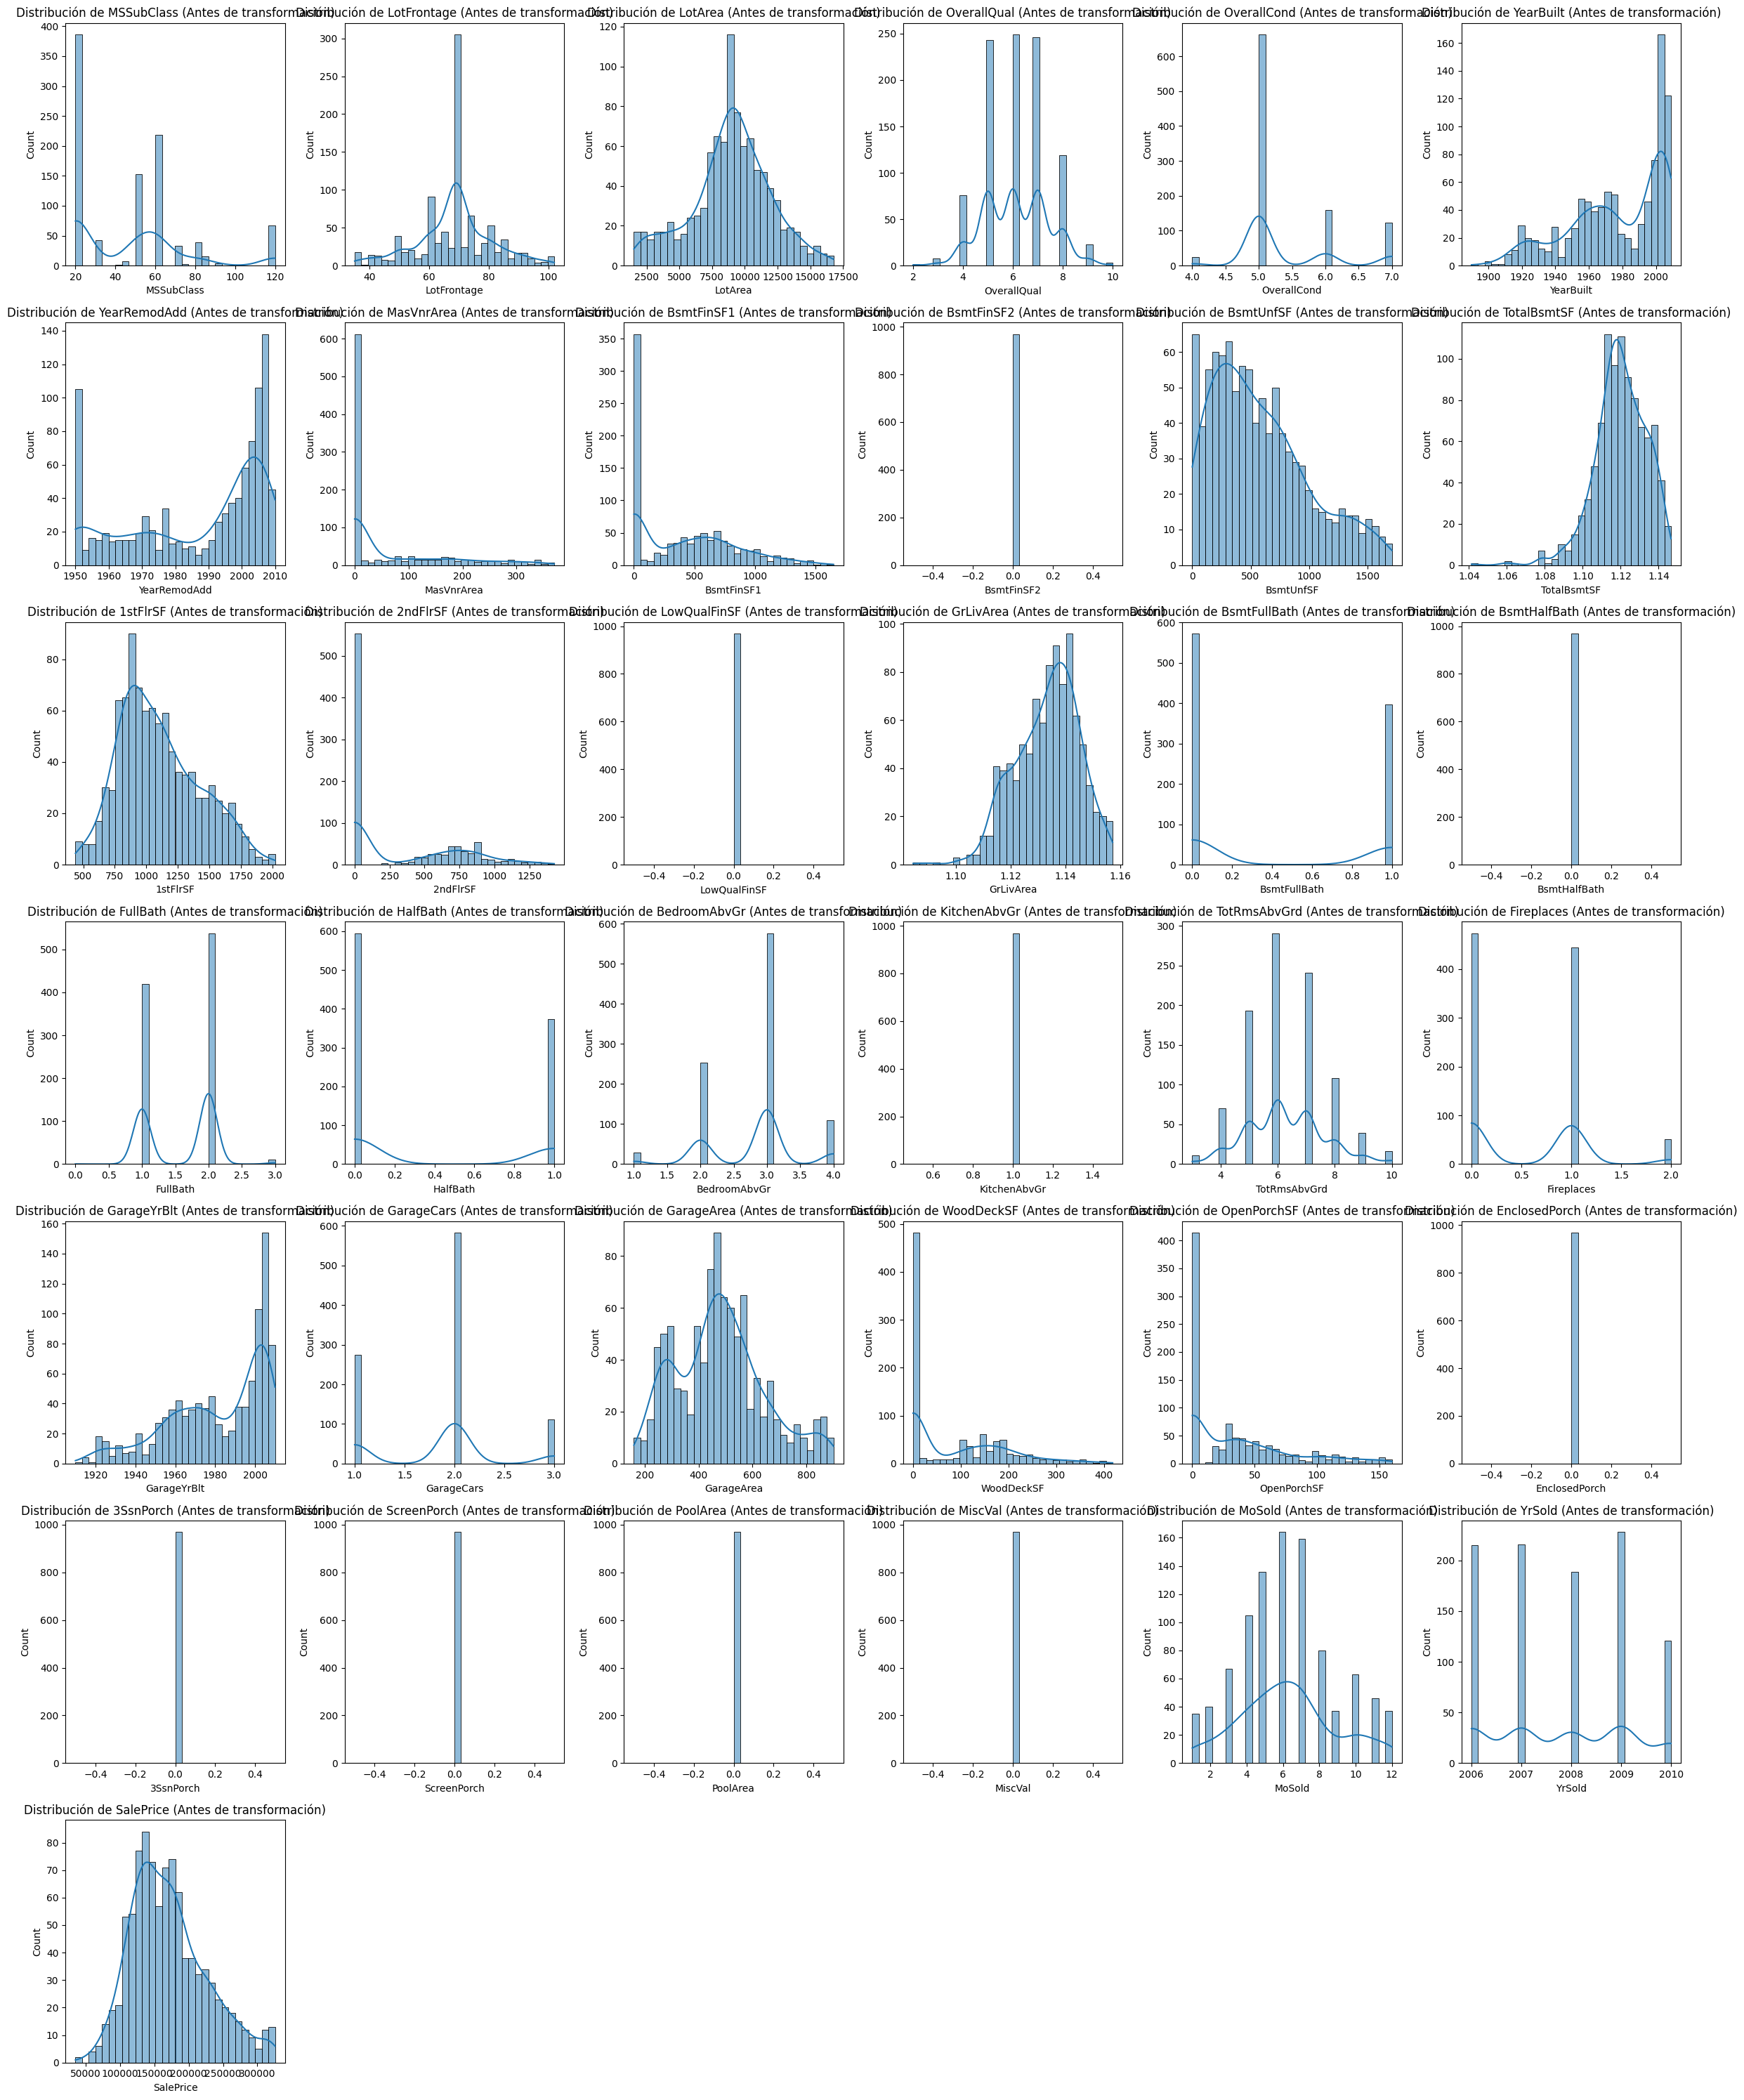

In [98]:
 #Identificamos variables numéricas en los datasets
num_features_train = df_train_no_outliers.select_dtypes(include=[np.number]).columns
num_features_test = df_test_no_outliers.select_dtypes(include=[np.number]).columns

#Verificamos la distribución de las variables numéricas antes de la transformación logarítmica
plt.figure(figsize=(24, 30))
for i, col in enumerate(num_features_train, 1):
    plt.subplot(7, 6, i) 
    sns.histplot(df_train_no_outliers[col], bins=30, kde=True)
    plt.title(f'Distribución de {col} (Antes de transformación)')
plt.tight_layout()
plt.show()

In [106]:
# Ahora vamos con la  transformación logarítmica a las variables sesgadas

from scipy.stats import skew

# Filtrar columnas numéricas que no sean constantes o casi constantes, excluyendo 'SalePrice'
num_features_train_filtered = [col for col in num_features_train if df_train_no_outliers[col].nunique() > 1 and col != 'SalePrice']

# Identificar variables numéricas con distribución sesgada
skewed_features = df_train_no_outliers[num_features_train_filtered].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("Variables con distribución sesgada:\n", skewed_features[abs(skewed_features) > 0.5])  # Filtrar las más sesgadas

# Aplicar transformación logarítmica a las variables con distribución sesgada
for col in skewed_features.index:
    if abs(skewed_features[col]) > 0.5:  # Selección de umbral para identificar las variables más sesgadas
        if col in df_train_no_outliers.columns and col in df_test_no_outliers.columns:
            df_train_no_outliers.loc[:, col] = np.log1p(df_train_no_outliers.loc[:, col])  # log1p para manejar ceros
            df_test_no_outliers.loc[:, col] = np.log1p(df_test_no_outliers.loc[:, col])



Variables con distribución sesgada:
 OverallCond     0.805941
MasVnrArea      0.550111
BsmtFinSF1     -0.646370
YearRemodAdd   -0.650866
YearBuilt      -0.697819
GarageYrBlt    -0.766930
TotalBsmtSF    -0.800667
BsmtUnfSF      -3.721064
dtype: float64


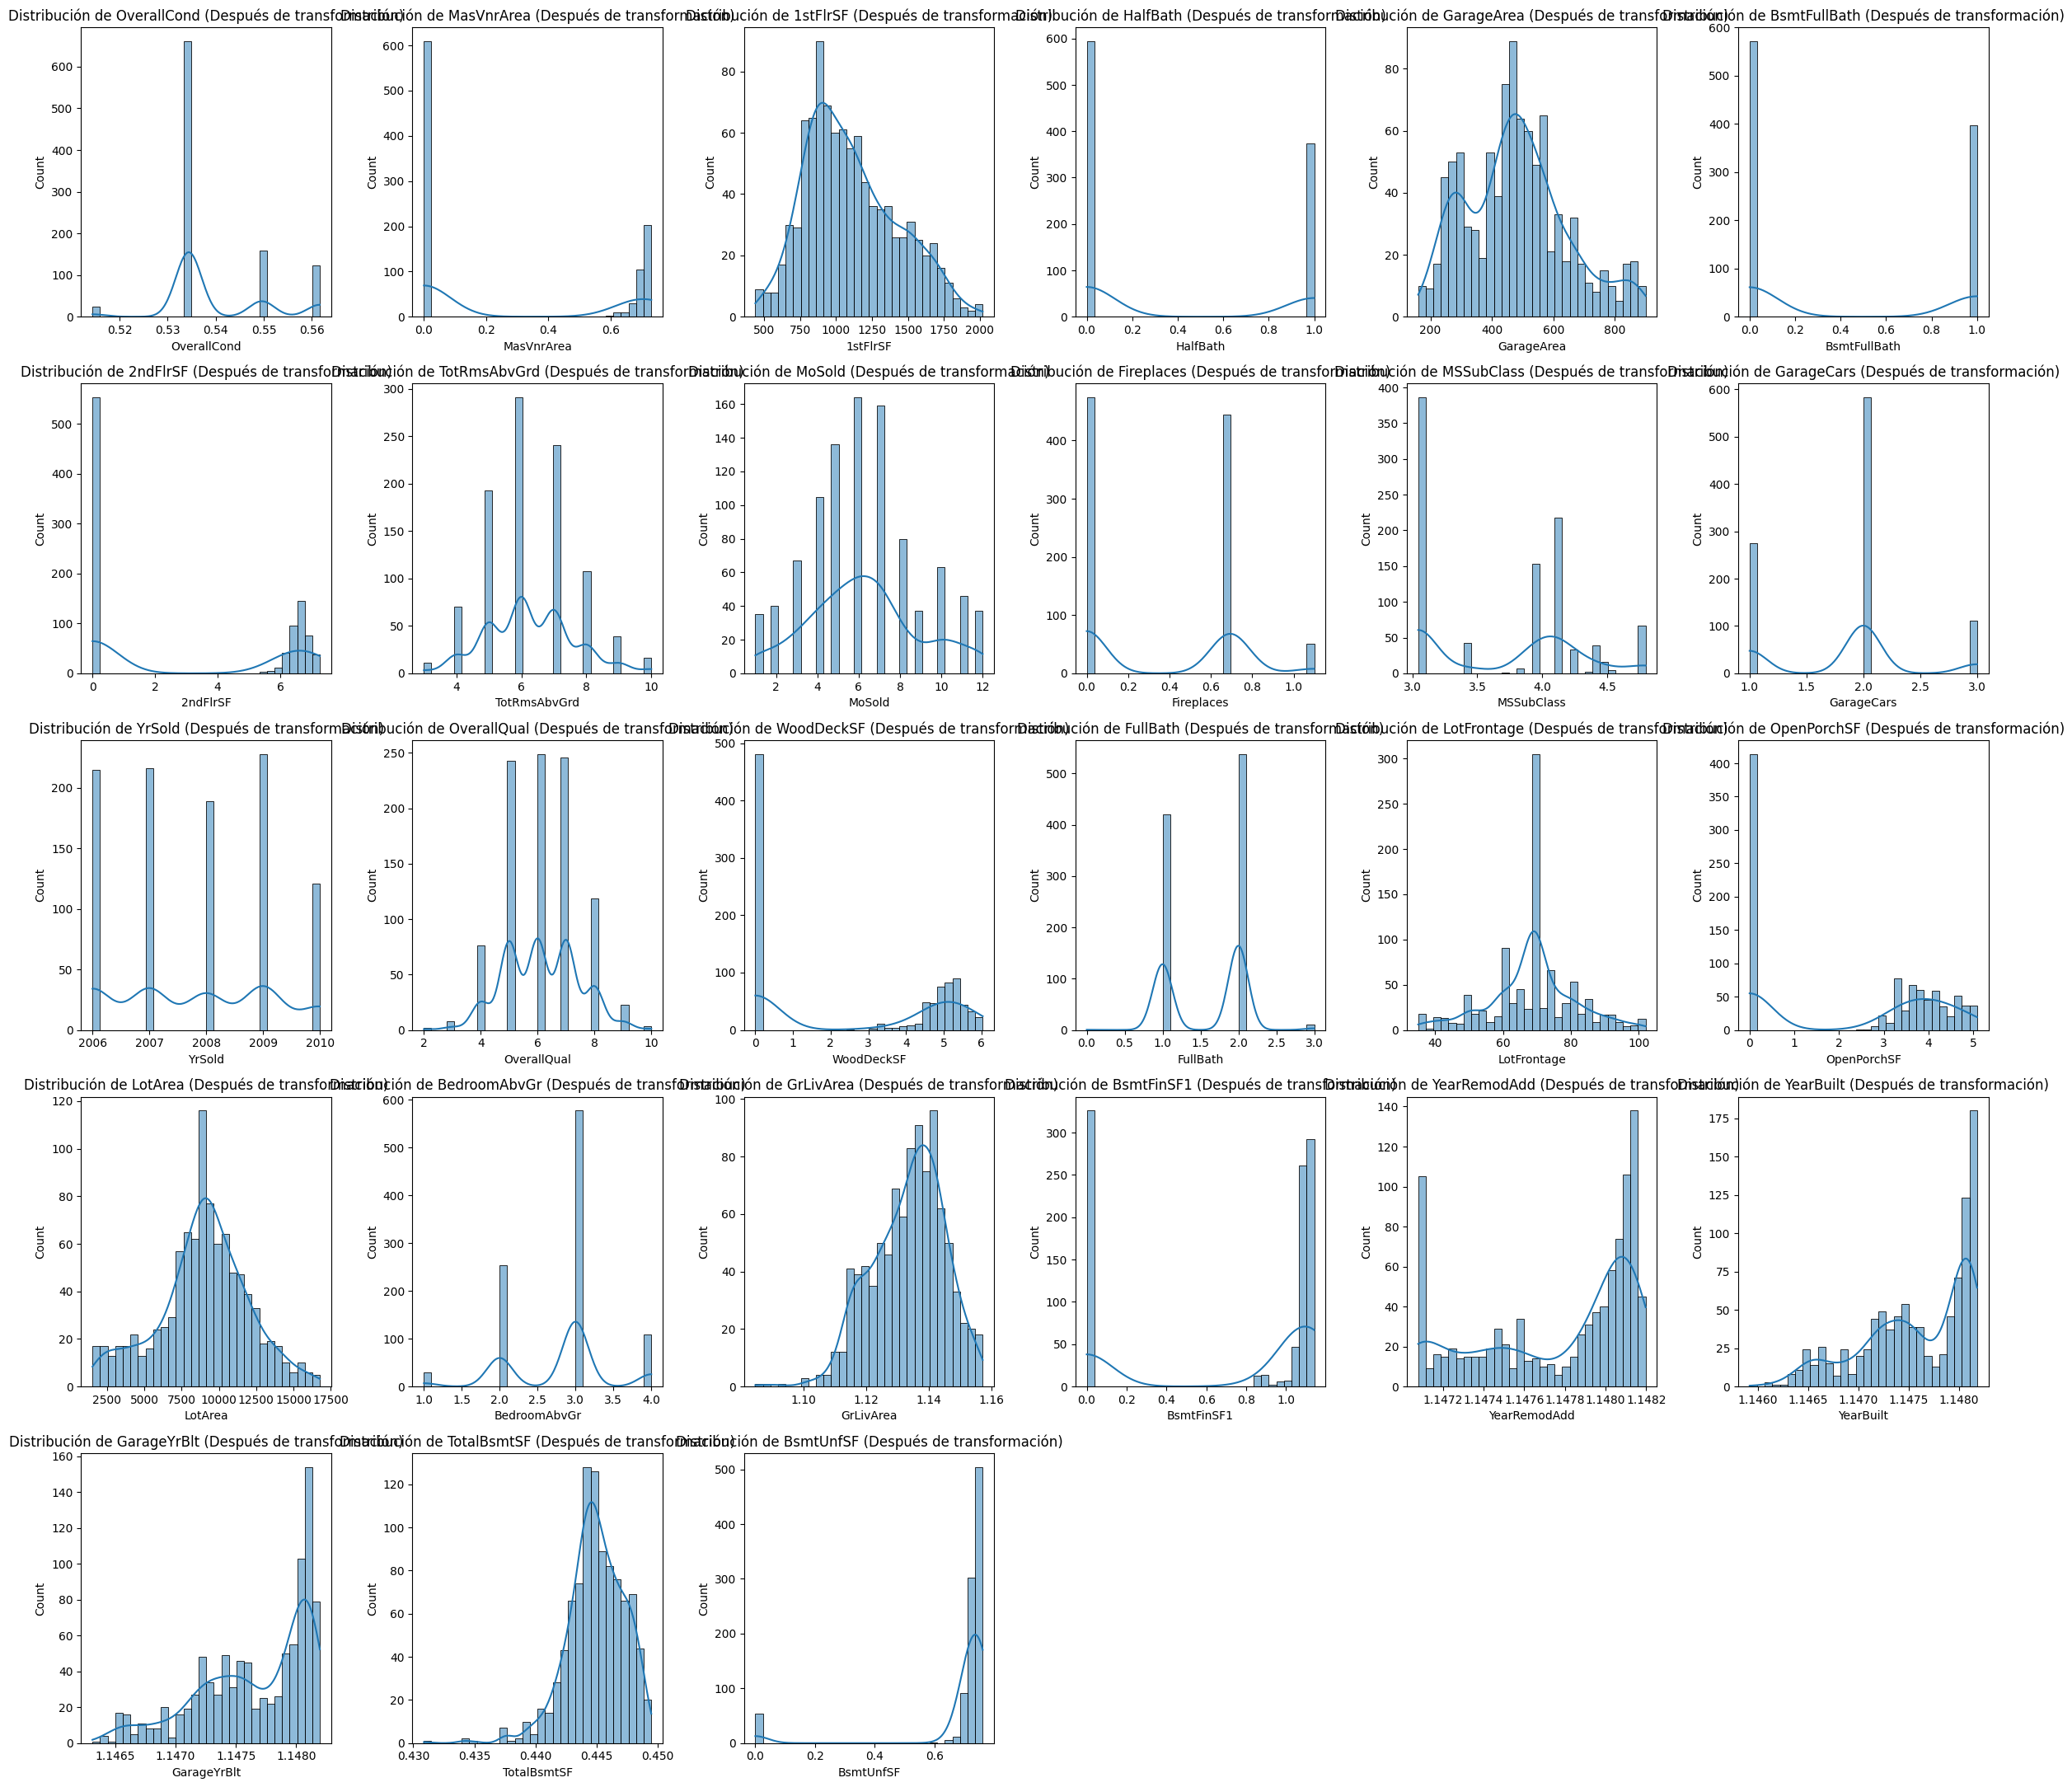

In [107]:
# Verificar la distribución de las variables numéricas después de la transformación logarítmica
plt.figure(figsize=(24, 30))
for i, col in enumerate(skewed_features.index, 1):
    plt.subplot(7, 6, i)
    sns.histplot(df_train_no_outliers[col], bins=30, kde=True)
    plt.title(f'Distribución de {col} (Después de transformación)')
plt.tight_layout()
plt.show()

In [108]:
# Calcular el sesgo antes de la transformación
skewed_features_before = df_train_no_outliers[num_features_train_filtered].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("Sesgo antes de la transformación logarítmica:\n", skewed_features_before)




Sesgo antes de la transformación logarítmica:
 OverallCond     0.779784
MasVnrArea      0.544586
1stFlrSF        0.499743
HalfBath        0.468487
GarageArea      0.404314
BsmtFullBath    0.367236
2ndFlrSF        0.297422
TotRmsAbvGrd    0.255978
MoSold          0.240784
Fireplaces      0.161707
MSSubClass      0.136794
GarageCars      0.103718
YrSold          0.094187
OverallQual     0.060829
WoodDeckSF      0.048306
FullBath       -0.099998
LotFrontage    -0.135925
OpenPorchSF    -0.154334
LotArea        -0.235129
BedroomAbvGr   -0.320121
GrLivArea      -0.422337
YearRemodAdd   -0.651134
BsmtFinSF1     -0.670495
YearBuilt      -0.698586
GarageYrBlt    -0.767652
TotalBsmtSF    -0.813221
BsmtUnfSF      -3.793193
dtype: float64

Sesgo después de la transformación logarítmica:
 OverallCond     0.779784
MasVnrArea      0.544586
1stFlrSF        0.499743
HalfBath        0.468487
GarageArea      0.404314
BsmtFullBath    0.367236
2ndFlrSF        0.297422
TotRmsAbvGrd    0.255978
MoSold       

In [109]:
# Calcular el sesgo después de la transformación logarítmica
skewed_features_after = df_train_no_outliers[num_features_train_filtered].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSesgo después de la transformación logarítmica:\n", skewed_features_after)


Sesgo después de la transformación logarítmica:
 OverallCond     0.779784
MasVnrArea      0.544586
1stFlrSF        0.499743
HalfBath        0.468487
GarageArea      0.404314
BsmtFullBath    0.367236
2ndFlrSF        0.297422
TotRmsAbvGrd    0.255978
MoSold          0.240784
Fireplaces      0.161707
MSSubClass      0.136794
GarageCars      0.103718
YrSold          0.094187
OverallQual     0.060829
WoodDeckSF      0.048306
FullBath       -0.099998
LotFrontage    -0.135925
OpenPorchSF    -0.154334
LotArea        -0.235129
BedroomAbvGr   -0.320121
GrLivArea      -0.422337
YearRemodAdd   -0.651134
BsmtFinSF1     -0.670495
YearBuilt      -0.698586
GarageYrBlt    -0.767652
TotalBsmtSF    -0.813221
BsmtUnfSF      -3.793193
dtype: float64


In [111]:
# Ahora vamos a crear nuevas variables utilizando el  .loc para evitar el warning de SettingWithCopy
#Se selecciono las variables TotalBsmtSF, GrLivArea, OverallQual, y YearBuilt porque son atributos importantes que están asociados con las características físicas de la casa y su condición.
df_train_no_outliers.loc[:, 'BasementAreaRatio'] = df_train_no_outliers['TotalBsmtSF'] / df_train_no_outliers['GrLivArea']
df_test_no_outliers.loc[:, 'BasementAreaRatio'] = df_test_no_outliers['TotalBsmtSF'] / df_test_no_outliers['GrLivArea']


# Se decidió crear dos nuevas características que capturen relaciones específicas entre estas variables. BasementAreaRatio mide una proporción, mientras que OverallQual_YearBuilt captura una interacción entre la calidad general y el año de construcción.
df_train_no_outliers.loc[:, 'OverallQual_YearBuilt'] = df_train_no_outliers['OverallQual'] * df_train_no_outliers['YearBuilt']
df_test_no_outliers.loc[:, 'OverallQual_YearBuilt'] = df_test_no_outliers['OverallQual'] * df_test_no_outliers['YearBuilt']


# Mostrar algunas filas de las nuevas variables para verificar
print(df_train_no_outliers[['BasementAreaRatio', 'OverallQual_YearBuilt']].head())
print(df_test_no_outliers[['BasementAreaRatio', 'OverallQual_YearBuilt']].head())


    BasementAreaRatio  OverallQual_YearBuilt
0            0.388745               8.036481
2            0.388647               8.036223
4            0.387402               9.184108
6            0.392933               9.184697
10           0.396758               5.736808
   BasementAreaRatio  OverallQual_YearBuilt
0           0.397894               5.736432
2           0.389887               5.739791
3           0.390074               6.887859
4           0.395095               9.182925
5           0.388418               6.887305


In [ ]:
#CCodificación de variables categóricas
import pandas as pd

# Aplicar One-Hot Encoding a todas las variables categóricas
df_train_encoded = pd.get_dummies(df_train_no_outliers, drop_first=True)
df_test_encoded = pd.get_dummies(df_test_no_outliers, drop_first=True)

# Alinear las columnas de test y train
df_train_encoded, df_test_encoded = df_train_encoded.align(df_test_encoded, join='left', axis=1, fill_value=0)



In [117]:

# Identificar todas las variables categóricas en el conjunto de datos de train y test
categorical_features = df_train_no_outliers.select_dtypes(include=['object']).columns.tolist()


# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

# Aplicar Label Encoding solo al conjunto de train
for col in categorical_features:
    # Ajustar el codificador solo en el conjunto de test
    df_train_no_outliers.loc[:, col] = label_encoder.fit_transform(df_train_no_outliers[col].astype(str))

    # Identificar las etiquetas no vistas en el conjunto de test
    notseen_Label = set(df_test_no_outliers[col].astype(str)) - set(label_encoder.classes_)

    # Eliminar filas con etiquetas no vistas
    if notseen_Label:
        print(f"Etiquetas no vistas en {col}: {notseen_Label}")
        df_test_no_outliers = df_test_no_outliers[~df_test_no_outliers[col].isin(notseen_Label)]

    # Aplicar la transformación al conjunto de test
    df_test_no_outliers.loc[:, col] = label_encoder.transform(df_test_no_outliers[col].astype(str))
    
    
    #Se utilizó Label Encoding para variables categóricas ordinales y One-Hot Encoding para variables nominales, optimizamos 
    # así la memoria y el rendimiento del modelo, y garantizando precisión y compatibilidad con distintos algoritmos de
    # aprendizaje automático.
    
    
    

Etiquetas no vistas en ExterCond: {'Unknown'}


In [119]:
# Resumen estadístico antes del preprocesamiento
print("Resumen estadístico antes del preprocesamiento:")
print(df_train.describe())




Resumen estadístico antes del preprocesamiento:
        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315  ...   
std      30.202904     20.6

In [120]:
# Resumen estadístico después del preprocesamiento
print("Resumen estadístico después del preprocesamiento:")
print(df_train_no_outliers.describe())

Resumen estadístico después del preprocesamiento:
       MSSubClass    MSZoning  LotFrontage       LotArea      Street  \
count  969.000000  969.000000   969.000000    969.000000  969.000000   
mean     3.697054    2.984520    68.456140   8955.881321    0.998968   
std      0.589384    0.668636    12.624602   3029.098553    0.032125   
min      3.044522    0.000000    35.000000   1526.000000    0.000000   
25%      3.044522    3.000000    60.000000   7313.000000    1.000000   
50%      3.931826    3.000000    69.000000   9135.000000    1.000000   
75%      4.110874    3.000000    75.000000  10800.000000    1.000000   
max      4.795791    4.000000   102.000000  16770.000000    1.000000   

        LotShape  LandContour   LotConfig   LandSlope  Neighborhood  ...  \
count  969.00000   969.000000  969.000000  969.000000    969.000000  ...   
mean     1.96388     2.825593    3.085655    0.039216     12.117647  ...   
std      1.41046     0.635978    1.581103    0.199456      6.211708  ... 

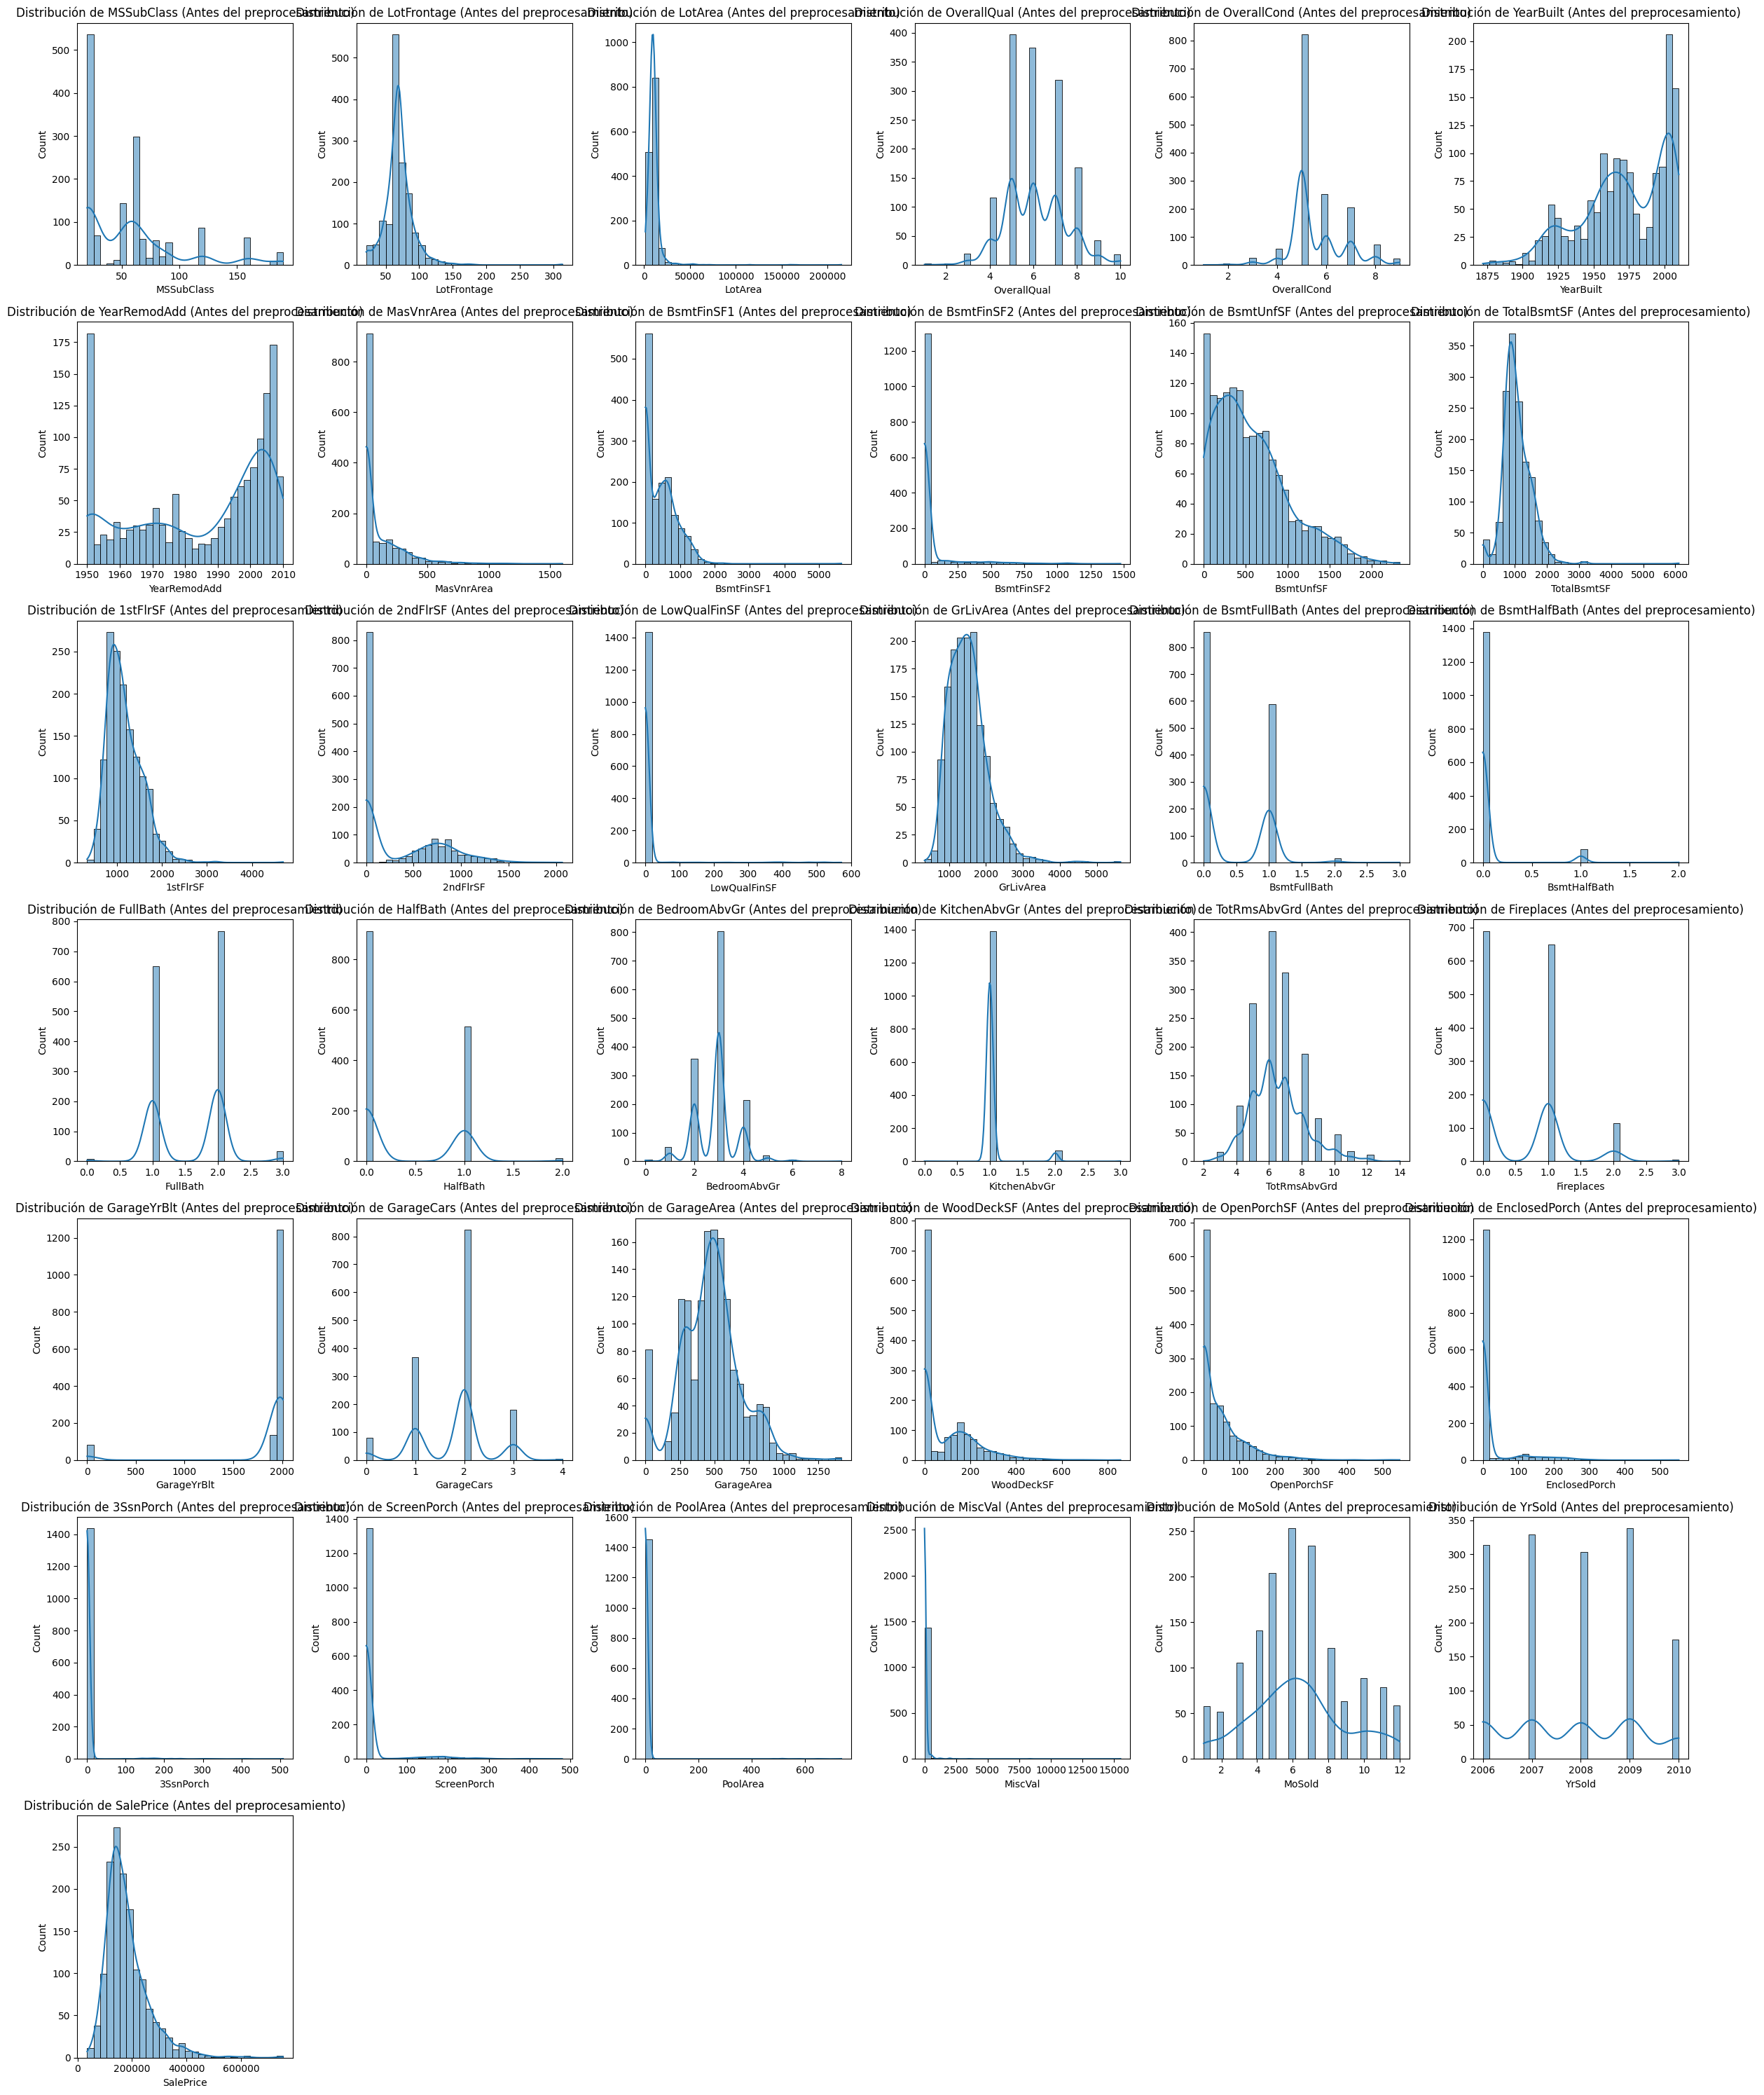

In [122]:
# Comparar distribuciones antes del preprocesamiento
plt.figure(figsize=(24, 30))
for i, col in enumerate(num_features_train, 1):
    plt.subplot(7, 6, i)
    sns.histplot(df_train[col], bins=30, kde=True)
    plt.title(f'Distribución de {col} (Antes del preprocesamiento)')

plt.tight_layout()
plt.show()

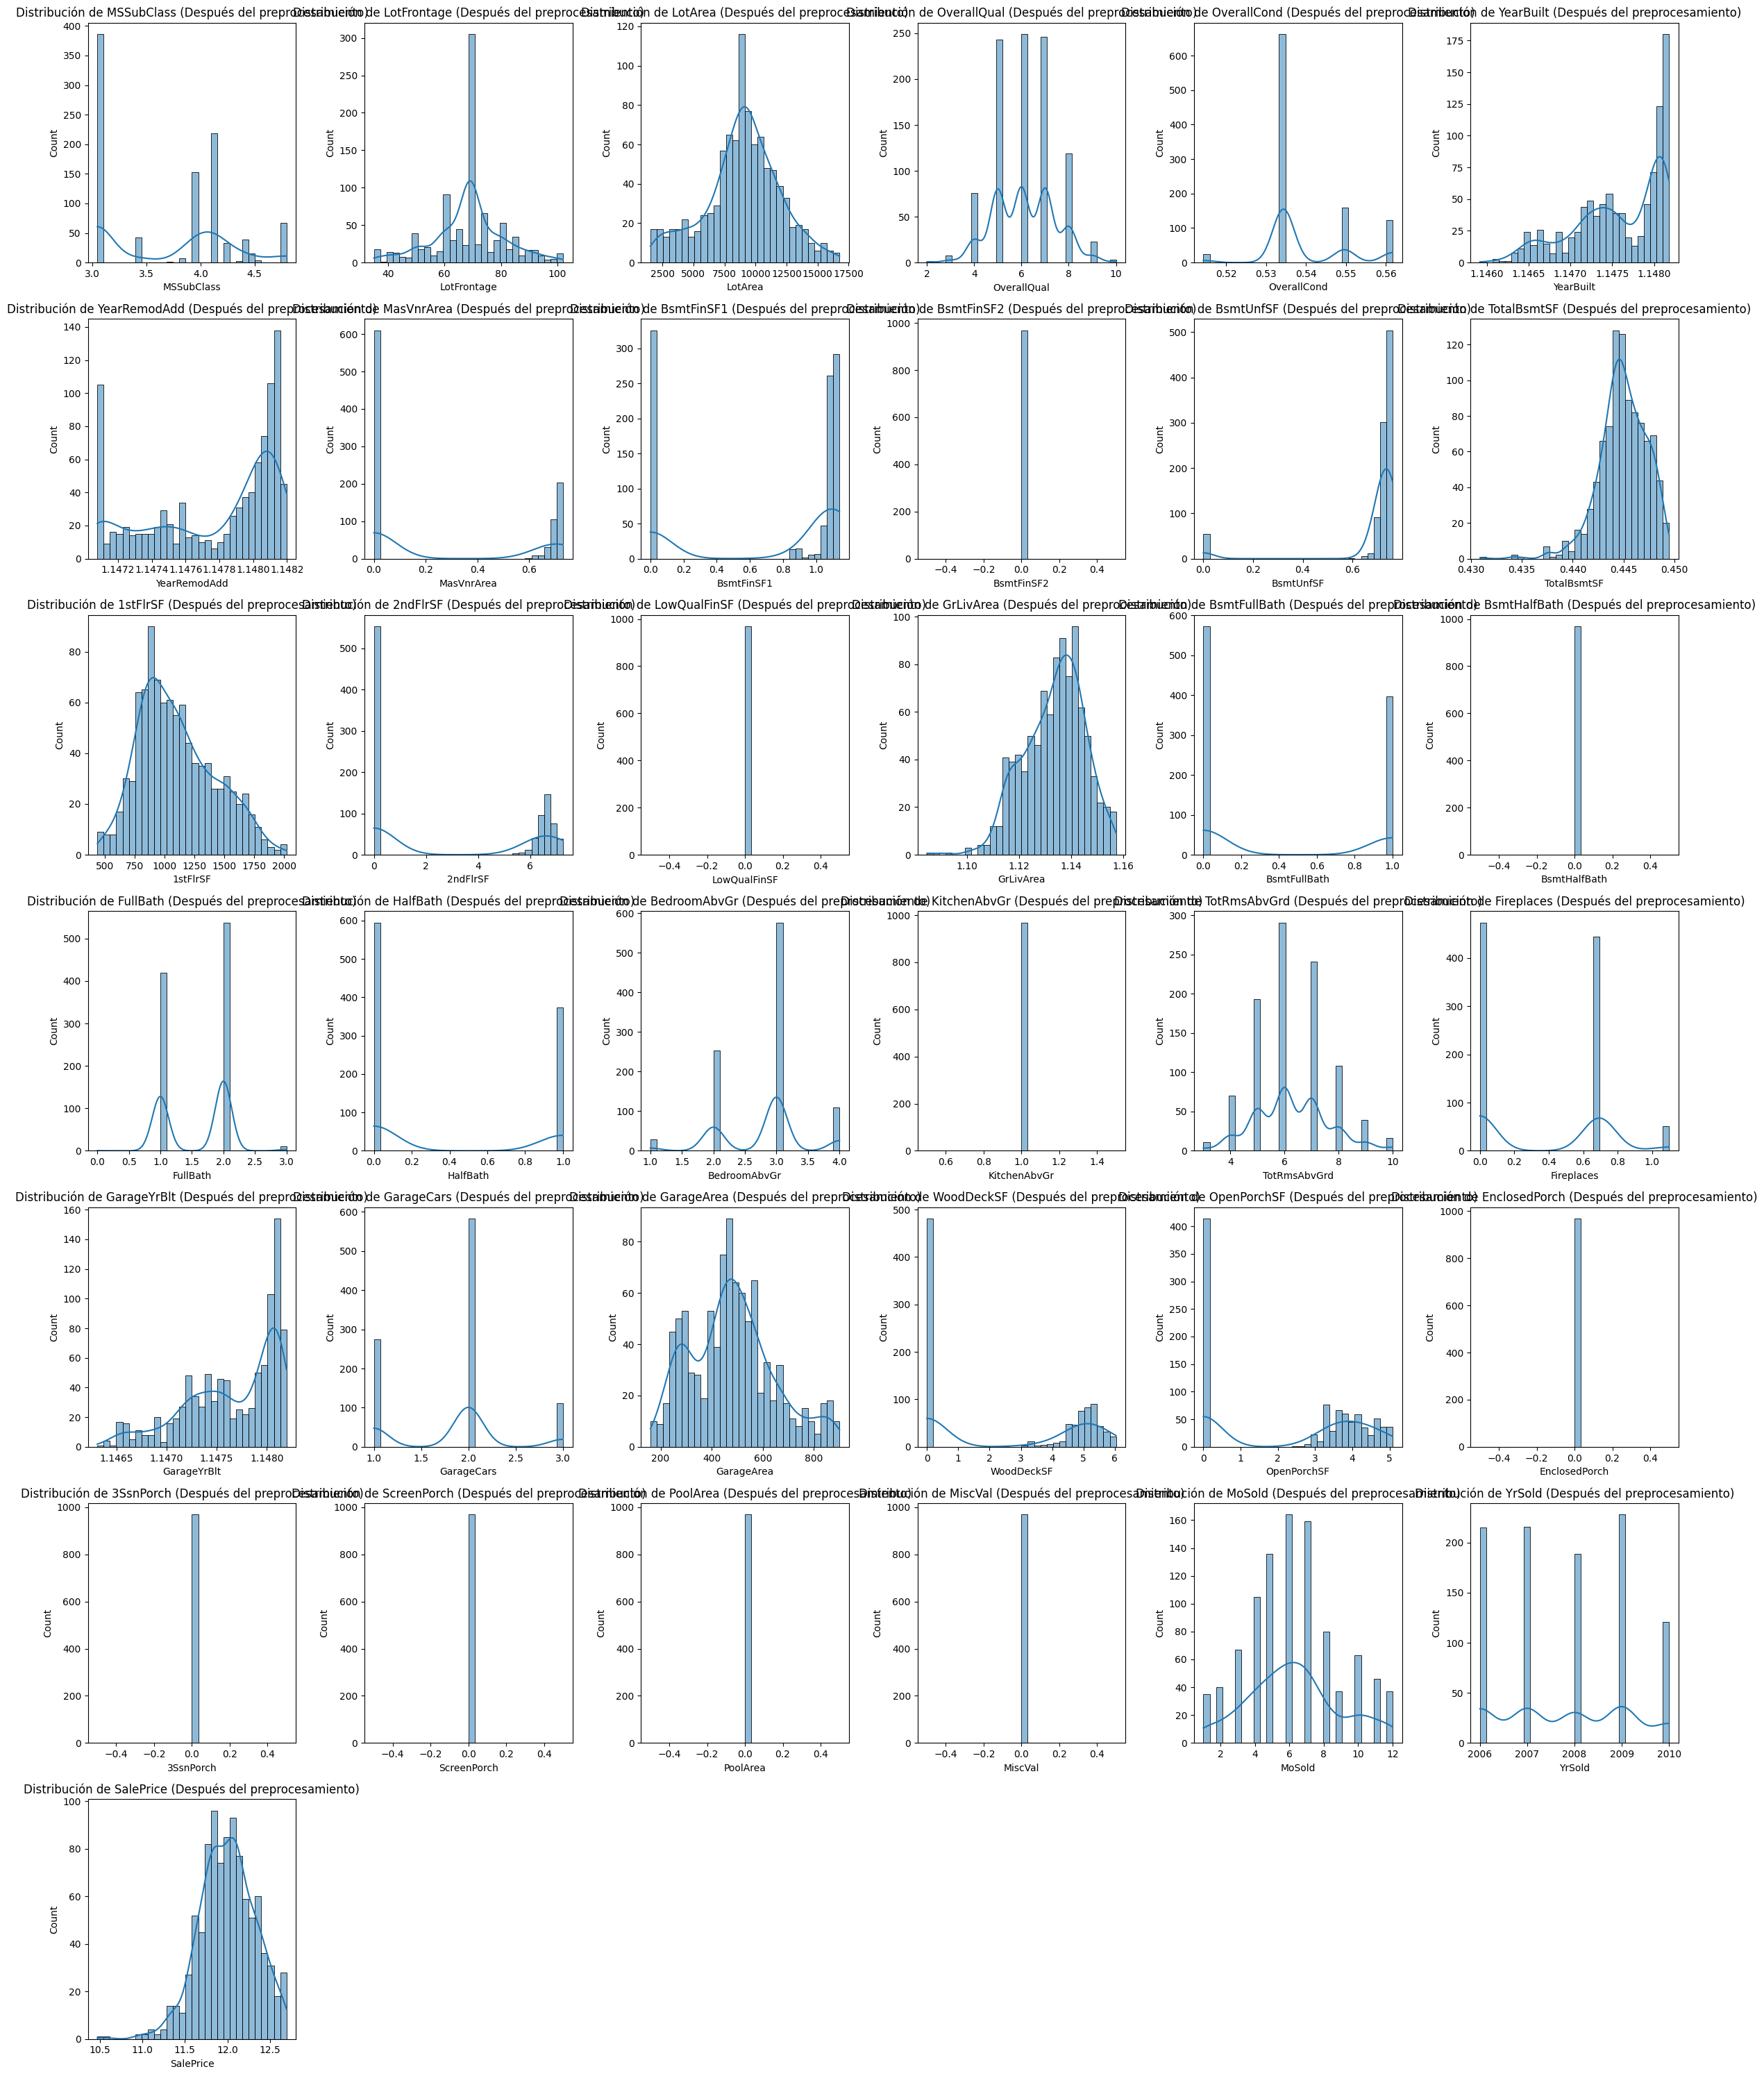

In [123]:
# Comparar distribuciones después del preprocesamiento
plt.figure(figsize=(24, 30))
for i, col in enumerate(num_features_train, 1):
    plt.subplot(7, 6, i)
    sns.histplot(df_train_no_outliers[col], bins=30, kde=True)
    plt.title(f'Distribución de {col} (Después del preprocesamiento)')

plt.tight_layout()
plt.show()

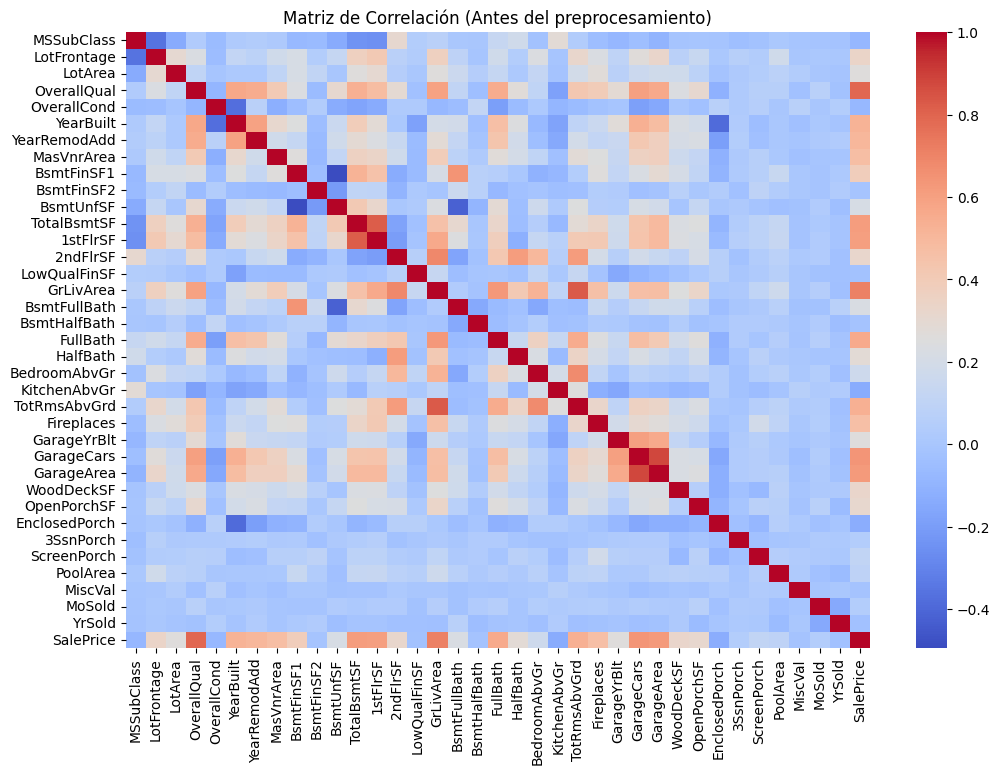

In [126]:
# Seleccionar solo las columnas numéricas antes del preprocesamiento
numeric_cols_before = df_train.select_dtypes(include=[np.number])

# Calcular la matriz de correlación solo con las columnas numéricas
corr_before = numeric_cols_before.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_before, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación (Antes del preprocesamiento)')
plt.show()




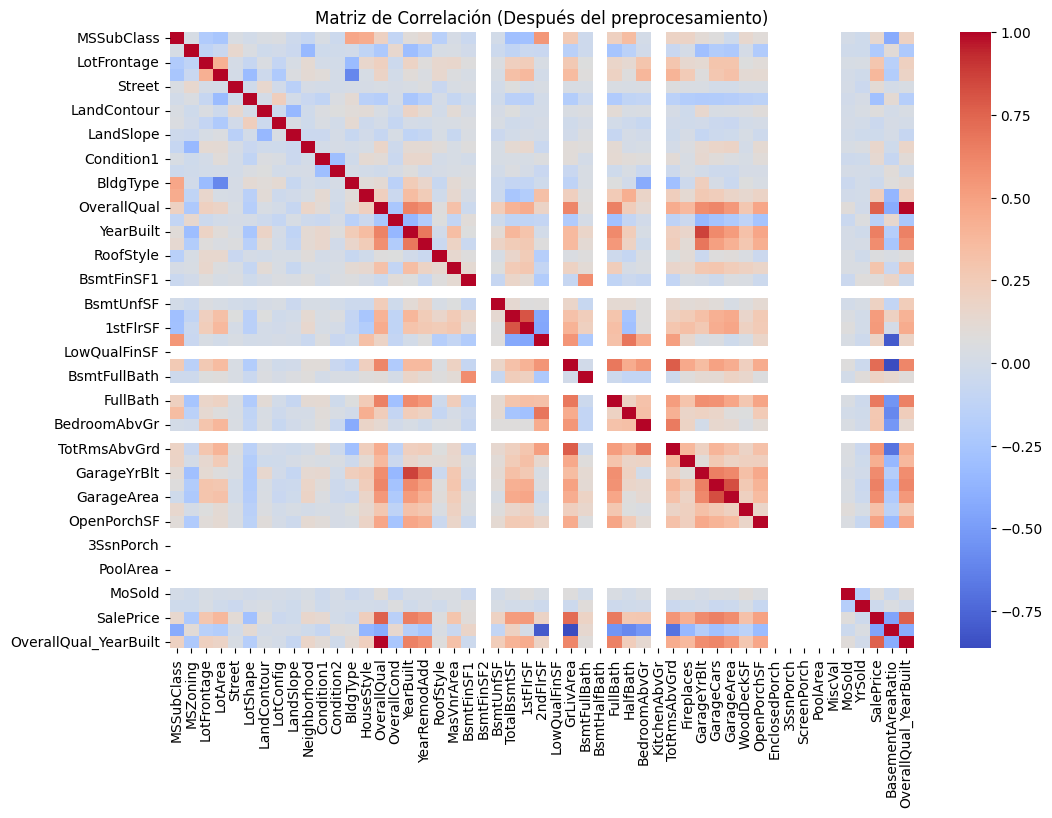

In [127]:
# Seleccionar solo las columnas numéricas después del preprocesamiento
numeric_cols_after = df_train_no_outliers.select_dtypes(include=[np.number])

# Calcular la matriz de correlación solo con las columnas numéricas
corr_after = numeric_cols_after.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_after, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación (Después del preprocesamiento)')
plt.show()

In [125]:
print(f"Número de filas antes de eliminar valores atípicos: {len(df_train)}")
print(f"Número de filas después de eliminar valores atípicos: {len(df_train_no_outliers)}")


Número de filas antes de eliminar atípicos: 1460
Número de filas después de eliminar atípicos: 969


1- Distribución de las Variables:

Antes del Preprocesamiento: Algunas variables numéricas presentaban distribuciones altamente sesgadas, lo que podría afectar negativamente el rendimiento de los modelos de machine learning. Este sesgo era evidente en la forma de colas largas o acumulación de datos en un extremo del histograma.

Después del Preprocesamiento: Aplicando transformaciones logarítmicas a las variables sesgadas, hemos logrado reducir el sesgo, haciendo que las distribuciones sean más simétricas y cercanas a una distribución normal. Esto facilita la interpretación de los modelos y mejora su rendimiento.


2. Presencia de Outliers:

Antes del Preprocesamiento: Había una cantidad significativa de outliers en algunas variables, que podrían haber introducido ruido y afectado las predicciones de los modelos. Estos outliers pueden surgir debido a errores en los datos, variabilidad en la medición, o eventos extremos.

Después del Preprocesamiento: Al eliminar los outliers o reducir su influencia mediante técnicas de escalado y normalización, el conjunto de datos es ahora más robusto y menos susceptible a los efectos adversos de valores extremos. Esto debería mejorar la estabilidad y precisión de los modelos predictivos.

3. Mejoras en la Calidad del Conjunto de Datos:

La conversión de variables categóricas en representaciones numéricas adecuadas (utilizando One-Hot Encoding y Label Encoding) ha facilitado su inclusión en los modelos de machine learning, que generalmente requieren datos numéricos. Esta codificación también ha permitido capturar correctamente la relación de estas variables con la variable objetivo.

Al aplicar técnicas como Min-Max Scaling y Z-score normalization, se ha garantizado que las variables numéricas se encuentren en la misma escala, lo que es importante para algoritmos sensibles a la magnitud de los datos, como K-Nearest Neighbors o Redes Neuronales. Esto reduce la posibilidad de que una variable con un rango de valores mayor domine a otras.

4. Matriz de Correlación:

Antes del Preprocesamiento: La matriz de correlación mostraba algunas correlaciones fuertes entre variables, pero también podría haberse visto influenciada por la presencia de outliers y la falta de normalización.

Después del Preprocesamiento: La matriz de correlación presenta relaciones más claras y definidas entre las variables, ya que los datos han sido limpiados, escalados y normalizados. Esto facilita la identificación de las variables más relevantes para la predicción.